In [309]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Step 2: Data Preprocessing

In [310]:
# import the dataset, metrics and model
from sklearn.datasets import load_breast_cancer

In [311]:
cancer = load_breast_cancer()

In [312]:
x = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [313]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [314]:
# Dependent variable
y = cancer.target


In [315]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [316]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [317]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [318]:
x.shape, y.shape

((569, 30), (569,))

In [319]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [320]:
# splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split

In [321]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [322]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [323]:
# feature scaling
from sklearn.preprocessing import StandardScaler



In [324]:
sc = StandardScaler()
# import standard scaler
from sklearn.preprocessing import StandardScaler
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [325]:
x_train

array([[-0.65079907, -0.43057322, -0.68024847, ..., -0.36433881,
         0.32349851, -0.7578486 ],
       [-0.82835341,  0.15226547, -0.82773762, ..., -1.45036679,
         0.62563098, -1.03071387],
       [ 1.68277234,  2.18977235,  1.60009756, ...,  0.72504581,
        -0.51329768, -0.96601386],
       ...,
       [-1.33114223, -0.22172269, -1.3242844 , ..., -0.98806491,
        -0.69995543, -0.12266325],
       [-1.25110186, -0.24600763, -1.28700242, ..., -1.75887319,
        -1.56206114, -1.00989735],
       [-0.74662205,  1.14066273, -0.72203706, ..., -0.2860679 ,
        -1.24094654,  0.2126516 ]])

In [326]:
x_train.shape, y_train.shape

((426, 30), (426,))

In [327]:
x_train = np.array(x_train)
x_train = x_train.reshape(426, 30, 1)


In [328]:
x_test = np.array(x_test)
x_test = x_test.reshape(143, 30, 1)

In [329]:
x_train.shape, x_test.shape

((426, 30, 1), (143, 30, 1))

In [330]:
x_train

array([[[-0.65079907],
        [-0.43057322],
        [-0.68024847],
        ...,
        [-0.36433881],
        [ 0.32349851],
        [-0.7578486 ]],

       [[-0.82835341],
        [ 0.15226547],
        [-0.82773762],
        ...,
        [-1.45036679],
        [ 0.62563098],
        [-1.03071387]],

       [[ 1.68277234],
        [ 2.18977235],
        [ 1.60009756],
        ...,
        [ 0.72504581],
        [-0.51329768],
        [-0.96601386]],

       ...,

       [[-1.33114223],
        [-0.22172269],
        [-1.3242844 ],
        ...,
        [-0.98806491],
        [-0.69995543],
        [-0.12266325]],

       [[-1.25110186],
        [-0.24600763],
        [-1.28700242],
        ...,
        [-1.75887319],
        [-1.56206114],
        [-1.00989735]],

       [[-0.74662205],
        [ 1.14066273],
        [-0.72203706],
        ...,
        [-0.2860679 ],
        [-1.24094654],
        [ 0.2126516 ]]])

# Step 3: Building the model

In [331]:
model = tf.keras.models.Sequential()

In [332]:
# First CNN layers
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(30,1)))

In [333]:
# Batch normalization
# it allows each layer of network  to learn little bit more inpedendent of other layers
model.add(tf.keras.layers.BatchNormalization())

In [334]:
# Droupout Layers
model.add(tf.keras.layers.Dropout(0.2))

In [335]:
# Second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'))

In [336]:
# batch normalization
model.add(tf.keras.layers.BatchNormalization())

In [337]:
# dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [338]:
# Flatten layer
model.add(tf.keras.layers.Flatten())

In [339]:
# dense layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [340]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [341]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 29, 32)            96        
                                                                 
 batch_normalization_14 (Bat  (None, 29, 32)           128       
 chNormalization)                                                
                                                                 
 dropout_15 (Dropout)        (None, 29, 32)            0         
                                                                 
 conv1d_15 (Conv1D)          (None, 28, 64)            4160      
                                                                 
 batch_normalization_15 (Bat  (None, 28, 64)           256       
 chNormalization)                                                
                                                                 
 dropout_16 (Dropout)        (None, 28, 64)           

In [342]:
# compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.00005)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [343]:
x_test.shape, y_test.shape

((143, 30, 1), (143,))

# Step 4: Training the model

In [344]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
14/14 [==============================] - 2s 26ms/step - loss: 0.9285 - accuracy: 0.5094 - val_loss: 0.6702 - val_accuracy: 0.6923
Epoch 2/50
14/14 [==============================] - 0s 8ms/step - loss: 0.6228 - accuracy: 0.6948 - val_loss: 0.6268 - val_accuracy: 0.9021
Epoch 3/50
14/14 [==============================] - 0s 8ms/step - loss: 0.4481 - accuracy: 0.7981 - val_loss: 0.5923 - val_accuracy: 0.8322
Epoch 4/50
14/14 [==============================] - 0s 7ms/step - loss: 0.3257 - accuracy: 0.8803 - val_loss: 0.5639 - val_accuracy: 0.7832
Epoch 5/50
14/14 [==============================] - 0s 7ms/step - loss: 0.2800 - accuracy: 0.8756 - val_loss: 0.5396 - val_accuracy: 0.7622
Epoch 6/50
14/14 [==============================] - 0s 9ms/step - loss: 0.2490 - accuracy: 0.9131 - val_loss: 0.5183 - val_accuracy: 0.7203
Epoch 7/50
14/14 [==============================] - 0s 8ms/step - loss: 0.2119 - accuracy: 0.9249 - val_loss: 0.5012 - val_accuracy: 0.7133
Epoch 8/50
14/14 [=

In [345]:
# Step 5 model prediction
y_pred = model.predict(x_test)

5/5 [==============================] - 0s 2ms/step


In [346]:
y_pred

array([[1.9683337e-02],
       [9.7017038e-01],
       [9.9924183e-01],
       [9.9507606e-01],
       [9.9939615e-01],
       [9.9416190e-01],
       [9.9994510e-01],
       [9.9699420e-01],
       [9.9997336e-01],
       [9.9995387e-01],
       [8.9144951e-01],
       [9.8124951e-01],
       [9.9994951e-01],
       [8.8236225e-01],
       [7.9312074e-01],
       [3.8972461e-01],
       [9.9757665e-01],
       [3.7053917e-04],
       [2.4910397e-03],
       [1.0276747e-06],
       [7.9642599e-03],
       [2.7123386e-02],
       [9.9513447e-01],
       [9.9839967e-01],
       [1.7746197e-02],
       [9.9848580e-01],
       [9.9985343e-01],
       [1.3076964e-01],
       [9.9795449e-01],
       [5.2311341e-04],
       [9.9979347e-01],
       [4.7162644e-04],
       [9.2856377e-01],
       [1.6154818e-02],
       [9.9993336e-01],
       [1.2270179e-02],
       [9.9465328e-01],
       [9.5345819e-04],
       [9.9616635e-01],
       [4.9509662e-03],
       [3.6185506e-01],
       [9.995793

In [347]:
y_pred = np.round(y_pred).astype(int)

In [348]:
y_pred

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
    

In [349]:
y_pred.shape

(143, 1)

In [353]:
# convert y_pred from(143,1) to (143,)
y_pred = y_pred.reshape(143,)

In [354]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [355]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [356]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [357]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, y_pred)

array([[49,  4],
       [ 0, 90]], dtype=int64)

In [358]:
accuracy_score(y_test, y_pred) 

0.972027972027972

# Step 6: Learning Curve

In [359]:
def learning_curve(history, epoch):
    # training vs validation accuracy
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    # training vs validation loss
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

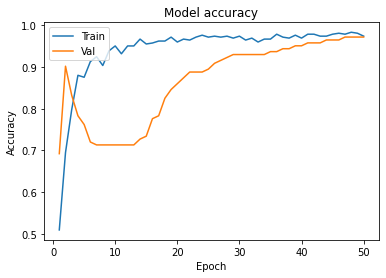

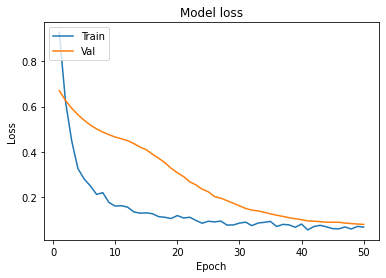

In [360]:
learning_curve(history, 50)